<a href="https://colab.research.google.com/github/xlr8r53/Stock-Market-Prediction-/blob/main/projaapldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import pandas as pd

In [220]:
df=pd.read_csv('aapldata.csv')

In [221]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-10-29,0.331607,0.333393,0.314286,0.314821,0.270310,239181600
1,2001-10-30,0.310357,0.321429,0.304643,0.314286,0.269851,276763200
2,2001-10-31,0.316607,0.328571,0.311429,0.313571,0.269237,273750400
3,2001-11-01,0.315179,0.335357,0.308036,0.331964,0.285030,312995200
4,2001-11-02,0.330714,0.336786,0.324286,0.331607,0.284723,197204000
...,...,...,...,...,...,...,...
5030,2021-10-21,148.809998,149.639999,147.869995,149.479996,149.479996,61421000
5031,2021-10-22,149.690002,150.179993,148.639999,148.690002,148.690002,58839600
5032,2021-10-25,148.679993,149.369995,147.619995,148.639999,148.639999,50720600
5033,2021-10-26,149.330002,150.839996,149.009995,149.320007,149.320007,60893400


In [222]:
df1=df.reset_index()['Close']

In [223]:
df1

0         0.314821
1         0.314286
2         0.313571
3         0.331964
4         0.331607
           ...    
5030    149.479996
5031    148.690002
5032    148.639999
5033    149.320007
5034    148.850006
Name: Close, Length: 5035, dtype: float64

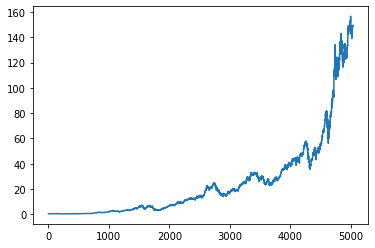

In [224]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [225]:
import numpy as np

In [226]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [227]:
print(df1)

[[5.14746294e-04]
 [5.11326796e-04]
 [5.06756813e-04]
 ...
 [9.48547722e-01]
 [9.52894051e-01]
 [9.49890000e-01]]


In [228]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [229]:
training_size,test_size

(3272, 1763)

In [230]:

train_data

array([[0.00051475],
       [0.00051133],
       [0.00050676],
       ...,
       [0.16601   ],
       [0.16663318],
       [0.16645741]])

In [231]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [232]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [233]:
print(X_train.shape), print(y_train.shape)

(3171, 100)
(3171,)


(None, None)

In [234]:
print(X_test.shape), print(ytest.shape)

(1662, 100)
(1662,)


(None, None)

In [235]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [236]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [237]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [238]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [239]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 [==============================] - 11s 155ms/step - loss: 3.9385e-04 - val_loss: 0.0028
Epoch 2/100
50/50 [==============================] - 7s 138ms/step - loss: 1.3781e-05 - val_loss: 0.0024
Epoch 3/100
50/50 [==============================] - 7s 137ms/step - loss: 1.2700e-05 - val_loss: 0.0025
Epoch 4/100
50/50 [==============================] - 7s 139ms/step - loss: 1.2022e-05 - val_loss: 0.0031
Epoch 5/100
50/50 [==============================] - 7s 138ms/step - loss: 1.1469e-05 - val_loss: 0.0024
Epoch 6/100
50/50 [==============================] - 7s 137ms/step - loss: 1.2770e-05 - val_loss: 0.0038
Epoch 7/100
50/50 [==============================] - 7s 138ms/step - loss: 1.0923e-05 - val_loss: 0.0029
Epoch 8/100
50/50 [==============================] - 7s 138ms/step - loss: 1.0800e-05 - val_loss: 0.0026
Epoch 9/100
50/50 [==============================] - 7s 140ms/step - loss: 1.2163e-05 - val_loss: 0.0027
Epoch 10/100
50/50 [==============================] - 

In [240]:
import tensorflow as tf

In [241]:

tf.__version__

'2.6.0'

In [242]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [243]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [244]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10.636370602831782

In [245]:
math.sqrt(mean_squared_error(ytest,test_predict))

66.90281176206891

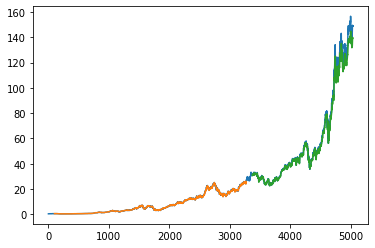

In [246]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [247]:
len(test_data)

1763

In [248]:
x_input=test_data[1663:].reshape(1,-1)
x_input.shape

(1, 100)

In [249]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [250]:
temp_input

[0.8085720051289146,
 0.81106471686851,
 0.8045453257840705,
 0.8124708719494788,
 0.8324765200652688,
 0.8271076078805584,
 0.8303672842480233,
 0.8408494771772991,
 0.8323487586736685,
 0.8441092494185384,
 0.8548470673963744,
 0.8530574300014708,
 0.8512039151065598,
 0.8492864204462816,
 0.8599603545325248,
 0.8698673303824835,
 0.8738940608600073,
 0.8758754330202931,
 0.8930688157152407,
 0.9062354615410791,
 0.9225340223427824,
 0.9140332015737923,
 0.9259854398672147,
 0.9220865666550656,
 0.9293729671084692,
 0.9518073983311673,
 0.9475250491966686,
 0.9341666558222775,
 0.9089837983292346,
 0.9326326434759341,
 0.9278389547621257,
 0.9367872312188327,
 0.9480363887759781,
 0.9507848150463227,
 0.9365954900618653,
 0.925154501865563,
 0.9293729671084692,
 0.930779128581023,
 0.9286060088721847,
 0.9403665060086397,
 0.9377459306120846,
 0.9384490113483615,
 0.9325687595843414,
 0.9322491611619993,
 0.9291173484514942,
 0.930779128581023,
 0.9501456182016386,
 0.951487895782599

In [251]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,-1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8857312]
101
1 day input [0.81106472 0.80454533 0.81247087 0.83247652 0.82710761 0.83036728
 0.84084948 0.83234876 0.84410925 0.85484707 0.85305743 0.85120392
 0.84928642 0.85996035 0.86986733 0.87389406 0.87587543 0.89306882
 0.90623546 0.92253402 0.9140332  0.92598544 0.92208657 0.92937297
 0.9518074  0.94752505 0.93416666 0.9089838  0.93263264 0.92783895
 0.93678723 0.94803639 0.95078482 0.93659549 0.9251545  0.92937297
 0.93077913 0.92860601 0.94036651 0.93774593 0.93844901 0.93256876
 0.93224916 0.92911735 0.93077913 0.95014562 0.9514879  0.96439883
 0.9584547  0.93397492 0.93614803 0.94567153 0.95538677 0.95481145
 0.94675809 0.94151694 0.9482921  0.977182   0.9689369  0.97328313
 0.98056953 0.98472412 1.         0.98990129 0.98325408 0.95065696
 0.95436409 0.94522407 0.95104044 0.94950642 0.93205743 0.91211571
 0.91524753 0.93071524 0.93697897 0.93755419 0.92764721 0.90553239
 0.91141263 0.90291181 0.9102621  0.88782766 0.9004191  0.9061076
 0.9143527  0.91185999 0.91128478 0

In [270]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [272]:
import matplotlib.pyplot as plt

In [273]:
len(df1)

5035

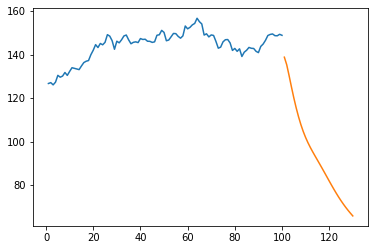

In [274]:
plt.plot(day_new,scaler.inverse_transform(df1[4935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

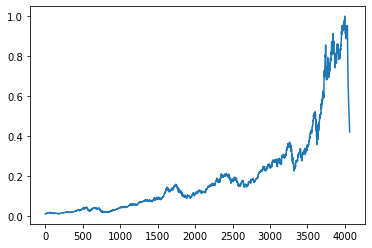

In [278]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [279]:
df3=scaler.inverse_transform(df3).tolist()

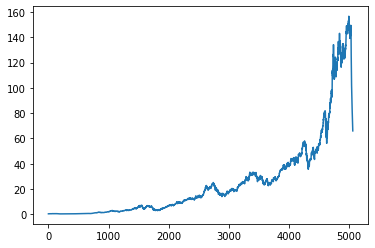

In [280]:
plt.plot(df3)